In [660]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [666]:


# split data table into data X and class labels y

X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

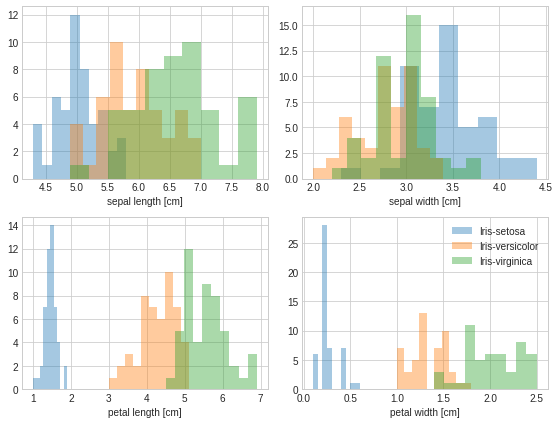

In [678]:


from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=.4,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=10)

    plt.tight_layout()
    plt.show()



In [679]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [683]:
X_std[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [689]:
mean_vec = np.mean(X_std, axis=0)
mean_vec

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [690]:
cov_mat = (X_std - mean_vec).T.dot((X_std-mean_vec)/(X_std.shape[0]-1))

In [691]:
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [692]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [697]:
eig_vecs.T[1]

array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])

In [707]:
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs.T[i]) for i in range(len(eig_vals))]

In [708]:
print(eig_pairs)

[(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173415, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163972, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.020746013995595326, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]


In [709]:
eig_pairs.sort(key=lambda X:X[0], reverse = True)

In [710]:
for pair in eig_pairs:
    print(pair[0])

2.930353775589317
0.9274036215173415
0.14834222648163972
0.020746013995595326


In [714]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse = True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[72.77045209380135, 23.03052326768064, 3.683831957627385, 0.5151926808906171]
[ 72.77045209  95.80097536  99.48480732 100.        ]


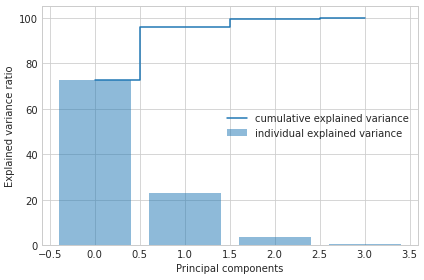

In [715]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [716]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [722]:
Y = X_std.dot(matrix_w)
print(Y)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3

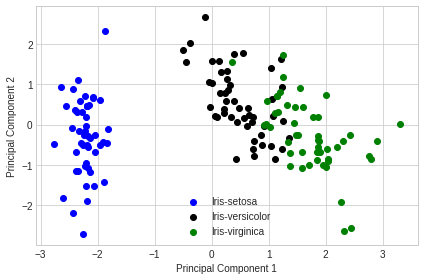

In [719]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'black', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


In [733]:
Y[:25]

array([[-2.26454173, -0.5057039 ],
       [-2.0864255 ,  0.65540473],
       [-2.36795045,  0.31847731],
       [-2.30419716,  0.57536771],
       [-2.38877749, -0.6747674 ],
       [-2.07053681, -1.51854856],
       [-2.44571134, -0.07456268],
       [-2.23384186, -0.24761393],
       [-2.34195768,  1.09514636],
       [-2.18867576,  0.44862905],
       [-2.16348656, -1.07059558],
       [-2.32737775, -0.15858745],
       [-2.22408272,  0.70911816],
       [-2.63971626,  0.93828198],
       [-2.19229151, -1.88997851],
       [-2.25146521, -2.72237108],
       [-2.20275048, -1.51375028],
       [-2.19017916, -0.51430431],
       [-1.89407429, -1.43111071],
       [-2.33994907, -1.15803343],
       [-1.91455639, -0.43046516],
       [-2.2046454 , -0.95245732],
       [-2.77416979, -0.48951703],
       [-1.82041156, -0.10675079],
       [-2.2282175 , -0.16218616]])

In [734]:
arr = Y[y=='Iris-setosa', 1]

In [735]:
for val in arr:
    print(val)

-0.5057039027737837
0.6554047293691375
0.31847731084725
0.5753677125331962
-0.6747673967025146
-1.5185485598885125
-0.07456267500687341
-0.24761393175226432
1.095146362582956
0.4486290483375601
-1.0705955760377255
-0.15858745465947527
0.7091181580302273
0.938281982107855
-1.8899785123164647
-2.7223710765744684
-1.5137502825462177
-0.514304308220692
-1.4311107069412359
-1.1580334289850005
-0.43046516328013706
-0.9524573172889975
-0.4895170265034945
-0.10675079283540534
-0.16218616266619623
0.6078925674838089
-0.2660143119816544
-0.5520164953235389
-0.33664040884505336
0.3148786028405291
0.48394209676925976
-0.4452668355028061
-1.8284751927341003
-2.185391615630892
0.4486290483375601
0.18433781054027976
-0.6849564262949355
0.4486290483375601
0.8821694147756177
-0.2927269549664454
-0.46799171567093717
2.327691606114911
0.45381638048979384
-0.4973916400183828
-1.1714321117742033
0.6919173471364108
-1.1506325928736658
0.3623907647258579
-1.0254825528235438
-0.032237845273778654
